<h1 align="center">Оценка качества моделей и отбор признаков</h1>

МФТИ ФИВТ: Курс Машинное Обучение (осень, 2016), Зухба Анастасия, a__l@mail.ru

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:



**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall <номер_группы> <фамилия>``, к примеру -- ``ML2016_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: В каких ситуациях полезно использовать AUC-ROC?

Бинарная классификация в случае равномерного распределения классов

**Вопрос 2**: Когда использование precision/recall предпочтительнее, чем AUC-ROC?

Когда в обучающей выборке объектов одного класса значительно больше чем другого

**Вопрос 3**: Для чего используются внутренние критерии, а для чего внешние?

Внутренние критерии используются для оценки качества обучения на обучающей выборке $X^l$, внешние на новых данных(не использующихся для обучения и настройки параметров модели)

**Вопрос 4**: Чем эмпирические критерии отличаются от аналитических?

Аналитические критерии отличаются от эмпирических тем, что они оценивают качество сразу для всех возможных выборок и методов обучения.

**Вопрос 5**: Что такое критерий регуляризации?

добавка к внутреннему критерию, накладывающая дополнительные ограничения на модель(обычно предпологается некоторое распределение и исходя из этого предположения выбирается регуляризатор)

# Определение спама по тексту электронного письма

Попробуем при помощи моделей машинного обучения построить алгоритм, отделяющий спам от нормальной почты. Для экспериментов воспользуемся небольшим набором данных с UCI. Объекты в датасете соответствуют письмам, которые описаны признаками на основе текста письма, спам — положительный пример для классификации, хорошее письмо — отрицательный пример.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Загрузка датасета Spambase

In [2]:
import pandas
import seaborn as sns
import urllib2

SPAMBASE_NAMES_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names'
SPAMBASE_DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'

feature_names = [
    line.strip().split(':')[0] 
    for line in urllib2.urlopen(SPAMBASE_NAMES_URL).readlines()[33:]
]
spam_data = pandas.read_csv(SPAMBASE_DATA_URL, header=None, names=(feature_names + ['spam']))
 
X, y = spam_data.ix[:, :-1].values, spam_data.ix[:, -1].values
 
spam_data.head()

/home/grapefroot/datascience2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


**Задание**
- Сколько примеров писем в датасете?
- Какова доля плохих писем?
- Какие характерные группы признаков представлены в наборе?

In [3]:
print 'Number of letters: {}'.format(len(spam_data['spam']))

Number of letters: 4601


In [4]:
print 'Fraction of spam letters: {}'.format(len(spam_data[spam_data['spam'] == 1]/len(spam_data)))

Fraction of spam letters: 1813


Характерные группы: частоты слов, частоты букв, длины слов

### Обучение классификатора и оценка его качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучение (train) и контроль (test). Выбор пропорции разбиения — компромисс: большой размер обучения ведет к более богатым информацией и качественным алгоритмам, большой размер контрольной выборки ведет к менее шумной оценке качества.

Для оценки качества классификации рассматривают матрицу ошибок: строчки соответствуют истинному классу, столбцы — предсказанному классификатором, ячейки содержат число примеров тестовой выборки.

<img src="confusion_matrix.png">

Диагональ матрицы ошибок содержит правильно классифицированные положительные (TP) и отрицательные (TN) примеры. False Positive (FP) — ошибки I рода (ложное срабатывание, положили в спам хорошее письмо), False Negative (FN) — ошибки II рода (не отфильтровали спам). Ошибки I и II рода могут иметь различную стоимость.

Часто рассматриваются следующие метрики качества бинарной классификации:

- Accuracy = (TP + TN) / (TP + TN + FP + FN) — доля правильных ответов
- Precision = TP / (TP + FP) — точность, доля спама среди писем, классифицированных как спам
- Recall = TP / (TP + FN) — полнота, доля спама, которая была отфильтрована
- F1 = 2TP / (2TP + FP + FN) — среднее гармоническое между точностью и полнотой

**Задание**
- Разбейте набор примеров на две непересекающиеся подвыборки следующим образом: train — первые 3000 примеров (≈65%), test — все остальные примеры.
- Обучите решающее дерево на train. Классифицируйте примеры из test. Посчитайте метрики качества классификации, описанные выше: Accuracy, Precision, Recall, F1. Рекомендованные параметры решающего дерева: разбиение по критерию gini, максимальная глубина: 7.
- Какие есть недостатки у получившейся оценки качества на подвыборке test? Как можно сделать оценку качества более информативной?
- Повторите эксперимент, перемешав случайно объекты исходной выборки перед разбиением.
- Какие признаки оказались наиболее важными для определения спама? Воспользуйтесь оценками важности признаков, полученых при построении решающего дерева.
- Какое качество дает лучшая константная модель (определяющая класс определенно и вне зависимости от признаков)?
- Обучите модель KNN и оцените ее качество на test. Рекомендованные параметры: K=10, евклидова метрика в качестве расстояния.
- Обучите модель KNN, предварительно приведя значения признаков к одинаковому масштабу. Оцените качество полученной модели на test. Дает ли подобное преобразование признаков прирост качества для модели KNN? Проделайте тот же эксперимент с решающим деревом. Почему масштабирование признаков не влияет на качество решающего дерева, но повышает качество классификации модели KNN?
- Сравните все обученные модели по всем метрикам.


In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

In [6]:
def print_metrics(y_true, y_pred):
    print 'precision score :{}'.format(precision_score(y_true=y_true, y_pred=y_pred))
    print 'recall score :{}'.format(recall_score(y_true=y_true, y_pred=y_pred))
    print 'accuracy_score :{}'.format(accuracy_score(y_true=y_true, y_pred=y_pred))
    print 'f1_score :{}'.format(f1_score(y_true=y_true, y_pred=y_pred))
    print 'roc_auc_score :{}'.format(roc_auc_score(y_true=y_true,y_score=y_pred))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.65)

In [8]:
assert X_train.shape[0] + X_test.shape[0] == X.shape[0]
assert y_train.shape[0] + y_test.shape[0] == y.shape[0]

In [9]:
dummy_classifier = DummyClassifier().fit(X_train, y_train)
dummy_classifier_predictions = dummy_classifier.predict(X_test)
print_metrics(y_test, dummy_classifier_predictions)

precision score :0.364309210526
recall score :0.38321799308
accuracy_score :0.503176195252
f1_score :0.373524451939
roc_auc_score :0.480982293543


In [10]:
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=7).fit(X_train, y_train)
decision_tree_predictions = decision_tree.predict(X_test)
print_metrics(y_test, decision_tree_predictions)

precision score :0.902173913043
recall score :0.861591695502
accuracy_score :0.910397860247
f1_score :0.881415929204
roc_auc_score :0.901368054835


In [11]:
knn_classifier = KNeighborsClassifier(n_neighbors=10, p=2).fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
print_metrics(y_test, knn_predictions)

precision score :0.703381642512
recall score :0.629757785467
accuracy_score :0.754262788365
f1_score :0.664536741214
roc_auc_score :0.731227666576


In [12]:
X_train_sc = MaxAbsScaler().fit_transform(X_train)
X_test_sc = MaxAbsScaler().fit_transform(X_test)

In [13]:
decision_tree = DecisionTreeClassifier().fit(X_train_sc, y_train)
decision_tree_predictions = decision_tree.predict(X_test_sc)
print_metrics(y_test, decision_tree_predictions)

precision score :0.778272484417
recall score :0.756055363322
accuracy_score :0.822467402207
f1_score :0.767003071523
roc_auc_score :0.810180270217


In [14]:
knn_sc_classifier = KNeighborsClassifier(n_neighbors=10, p=2).fit(X_train_sc, y_train)
knn_sc_predictions = knn_sc_classifier.predict(X_test_sc)
print_metrics(y_test, knn_sc_predictions)

precision score :0.896631823461
recall score :0.667820069204
accuracy_score :0.841858910064
f1_score :0.765493306891
roc_auc_score :0.809659353403


In [31]:
sorted(zip(spam_data.columns, decision_tree.feature_importances_), reverse=True, key=lambda x: x[-1])[:10]

[('char_freq_$', 0.33833563180360954),
 ('char_freq_!', 0.14770197955980791),
 ('capital_run_length_average', 0.093286402854660708),
 ('word_freq_free', 0.057530354207208811),
 ('word_freq_hp', 0.047638999070333199),
 ('word_freq_remove', 0.046095546715213785),
 ('word_freq_edu', 0.028471518460186151),
 ('word_freq_email', 0.016432140127110483),
 ('capital_run_length_total', 0.015483651552877785),
 ('word_freq_will', 0.015294535086491156)]

Масштабирование признаков в KNN дало прирост на всех метриках. Приведение к одинаковому масштабу работает в knn потому что оно позволяет равноценно учитывать каждый из признаков

В итоге должны быть построены и сравнены между собой следующие модели:

1) Константная модель
2) Решающее дерево
3) KNN
4) KNN с масштабированием признаков

### Выбор порога классификации

Многие модели классификации получают оценку принадлежности положительному классу $y'(x)\in R$. Затем принимают решение о классе объекта путем сравнения оценки с порогом: $y(x)=+1$, если $y'(x)<\theta$, $y(x)=−1$, если $y'(x)\geq\theta$

Матрица ошибок и все производные от нее метрики (Accuracy, Precision, Recall, etc.) зависят от порога $\theta$.


<img src="binary_threshold.png">

Для того чтобы видеть изменения метрик при всех значениях порога классификации, рассматривают координатную плоскость, по осям которой отложены значения метрик, а качество работы классификатора представлено в виде кривой — траектории изменения соответствующих метрик при варьировании порога:

<img src="roc_trajectory.png">

Наиболее распространены ROC-кривые (плоскость TP-vs-FP) и Precision/Recall кривые. Аббревиатура ROC (Receiver Operating Characteristic) была унаследована из инженерного дела.

<img src="roc_and_pr_curves.png">

В случае, если необходимо сравнить качество классификаторов вне зависимости от порога, применяют интегральные числовые метрики, например AUC-ROC (Area Under ROC) — площадь под ROC-кривой классификатора. AUC-ROC идеально работающего классификатора равно 1. Идеальный случайный классификатор в среднем имеет AUC-ROC=0.5.



**Задача 1**

 Определите функционал «доля дефектных пар» для задачи бинарной классификации. Как данный функционал связан с AUC-ROC?

**<Решение>**
Упорядочим объекты по неубыванию ответов классификатора. Обозначим истинные ответы на этих объектах $y_{(1)} \dots y_{(l)}$.

Доля дефектных пар - $DP(a, X^{l}) = \frac{2}{l(l-1)}\sum_{i<j}^l[y_{(i)} > y_{(j)}]$

Связь с AUC-ROC
Пусть

$l_+$ - число объектов класса $1$

$l_-$ - число объектов класса 0

$DP = \frac{2l_-l_+}{l(l-1)}(1-AUC)$

**Задача 2**

Приведите пример целевого вектора $y_1, \ldots , y_l$ и ответов алгоритма $b(x_1),\ldots,b(x_l)$, для которых AUC-ROC будет равен 0.5.

$y = (0, 1, 0, 1, 0, 1, 0, 1)$

$b = (1, 1, 1, 1, 1, 1, 1, 1)$


**Задание**

 Верно ли, что классификаторы из предыдущей части действуют путем сравнения некоторой оценки принадлежности положительному классу с порогом? Что это за оценки принадлежности? Какие пороги были выбраны?
 
Зависит от реализации. Вообще, можно оценивать вероятности принадлежности классам и выбирать argmax по классам. В случае бинарной классификации это эквивалентно сравнению с порогом 0.5. Однако в sklearn не во всех классификаторах это так реализовано.
 
 Для всех моделей, построенных в предыдущем задании:
- Постройте ROC и Precision/Recall кривые в одних координатных осях, линиями разных цветов. Добавьте легенду: какая кривая соответствует какому классификатору.
- Сравните значения AUC-ROC.

Какой максимальной полноты определения спама достигают построенные классификаторы, если перед вами стоит жесткое ограничение: точность классификатора не может быть меньше 90%?



In [15]:
from sklearn.metrics import precision_recall_curve

In [16]:
from sklearn.metrics import roc_curve

In [17]:
dummy_classifier_probas = dummy_classifier.predict_proba(X_test)
knn_classifier_probas = knn_classifier.predict_proba(X_test)
knn_sc_classifier_probas = knn_sc_classifier.predict_proba(X_test_sc)
decision_tree_probas = decision_tree.predict_proba(X_test)

In [18]:
precision_dummy, recall_dummy, _ = precision_recall_curve(y_test, dummy_classifier_probas[:, 1])
precision_knn, recall_knn, _ = precision_recall_curve(y_test, knn_classifier_probas[:, 1])
precision_knn_sc, recall_knn_sc, _ = precision_recall_curve(y_test, knn_sc_classifier_probas[:, 1])
precision_tree, recall_tree, _ = precision_recall_curve(y_test, decision_tree_probas[:, 1])

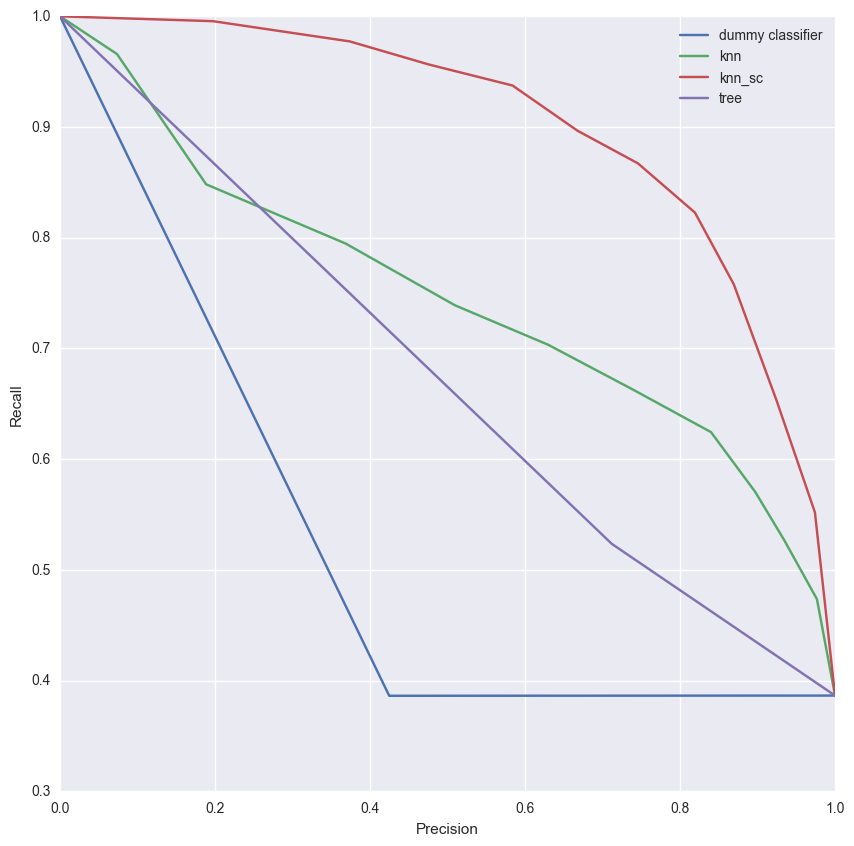

In [19]:
plt.figure(figsize=(10, 10))
plt.plot(recall_dummy, precision_dummy, label='dummy classifier')
plt.plot(recall_knn, precision_knn, label='knn')
plt.plot(recall_knn_sc, precision_knn_sc, label='knn_sc')
plt.plot(recall_tree, precision_tree, label='tree')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend()

In [ ]:
roc_curve()

In [22]:
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, dummy_classifier_probas[:, 1])
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_classifier_probas[:, 1])
fpr_knn_sc, tpr_knn_sc, _ = roc_curve(y_test, knn_sc_classifier_probas[:, 1])
fpr_tree, tpr_tree, _ = roc_curve(y_test, decision_tree_probas[:, 1])

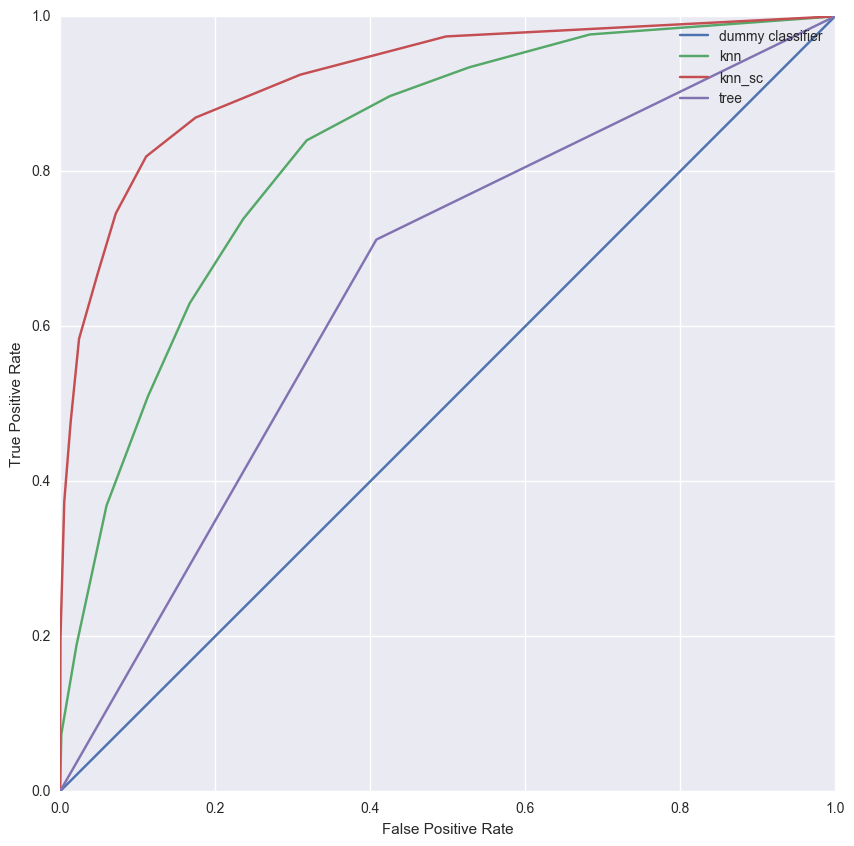

In [34]:
plt.figure(figsize=(10, 10))
plt.plot(fpr_dummy, tpr_dummy, label='dummy classifier')
plt.plot(fpr_knn, tpr_knn, label='knn')
plt.plot(fpr_knn_sc, tpr_knn_sc, label='knn_sc')
plt.plot(fpr_tree, tpr_tree, label='tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

### Кросс-валидация и подбор параметров

Каждая модель машинного обучения имеет множество структурных параметров и параметров обучения: число соседей и тип функции расстояния в KNN, максимальная высота дерева, минимальное число объектов в листе дерева и т.д. Нет универсальных наборов параметров, оптимально работающих во всех задачах, для каждой задачи нужно подбирать свой набор параметров.

Для оптимизации параметров модели часто используют перебор по сетке (grid search): для каждого параметра выбирается несколько значений, перебираются все комбинации значений параметров и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения метрики, которая оптимизируется).

Сравнение большого числа моделей при переборе параметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит переобучение на тестовую выборку.

Для устранения этой проблемы, данные разбивают на 3 непересекающихся подвыборки: обучение (train), валидация (validation) и контроль (test).

Валидационную подвыборку используют для сравнения моделей, а test — для окончательной оценки качества и сравнения семейств моделей с подобранными параметрами.

Более надежный способ объективного сравнения моделей — кросс-валидация. Существуют различные схемы кросс-валидации:

- Leave-One-Out
- K-Fold
- Многократное случайное разбиение выборки
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинаций. С учетом конечности времени на выполнение задания, возникает ряд компромиссов:

- сетку можно делать более разреженной, перебирая меньше значений каждого параметра, но в таком случае можно пропустить хорошую комбинацию параметров;
- кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества кросс-валидации становится более шумной и увеличивается риск выбрать неоптимальный набор параметров из-за случайности разбиения;
- параметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
- перебирать не все комбинации параметров, а небольшое число случайно выбранных.

**Задание**
- Выберите схему кросс-валидаци, одну из перечисленных выше. Зафиксируйте разбиение кросс-валидации обучающей выборки. Кросс-валидировать нужно по выборке train из предыдущих заданий, test должен остаться независимым. Обратите внимание: при сравнении моделей, набор разбиений кросс-валидации не должен меняться, должен быть строго фиксированным.
- Выберите одну метрику, которую будете оптимизировать при переборе параметров. Например, можно взять AUC-ROC.
- Найдите оптимальный набор параметров дерева, перебрав значения параметров по сетке. Параметры для настройки: критерий разбиения, максимальная глубина, число признаков для каждого узла, минимальное число объектов в листе (или часть из этих параметров).
- Найдите оптимальный набор параметров для KNN, перебрав значения параметров по сетке. Параметры для настройки: число соседей, функция расстояния, схема взвешивания (или часть из этих параметров).
- Сравните полученные модели с моделями из предыдущих заданий. Сравнение необходимо проводить на тестовой выборке, которая не участвовала в подборе и обучении. Сравнение нужно проводить только по метрике которая оптимизировалась.

используем 5-fold cv, оптимизируем AUC-ROC

In [15]:
random_seed = 777666

In [16]:
from sklearn.cross_validation import KFold
from sklearn.grid_search import GridSearchCV
import pprint

In [17]:
tree_param_grid = {
    'criterion':['gini', 'entropy'],
    'max_features':['auto', 'sqrt', 'log2'],
    'max_depth':[None,5, 6, 7, 8, 9, 10],
    'min_samples_leaf':[1, 2, 3, 4]
}
tree_cross_validation = KFold(X_train.shape[0], n_folds=100, random_state=random_seed, shuffle=True)
tree_optimizer = GridSearchCV(
                    estimator=DecisionTreeClassifier(),
                    param_grid=tree_param_grid,
                    scoring='roc_auc',
                    n_jobs=-1, 
                    cv=tree_cross_validation,
                    refit=True,
                    verbose=1)

In [18]:
tree_optimizer.fit(X_train, y_train)

Fitting 100 folds for each of 168 candidates, totalling 16800 fits


[Parallel(n_jobs=-1)]: Done 688 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3688 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 8688 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 15688 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 16800 out of 16800 | elapsed:   46.0s finished


GridSearchCV(cv=sklearn.cross_validation.KFold(n=1610, n_folds=100, shuffle=True, random_state=777666),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2'], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=1)

Параметры итоговой модели и метрики:

In [19]:
pprint.pprint(tree_optimizer.best_params_)
tuned_tree_prediction = tree_optimizer.predict(X_test)
print_metrics(y_test, tuned_tree_prediction)

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4}
precision score :0.855687606112
recall score :0.871218668971
accuracy_score :0.893346706787
f1_score :0.863383297645
roc_auc_score :0.889262551498


In [20]:
knn_param_grid = {
    'n_neighbors': [i for i in range(1, 11)],
    'weights':['uniform', 'distance'],
    'p': [i for i in range(1, 5)]
}
knn_cross_validation = KFold(X_train.shape[0], n_folds=1000, random_state=random_seed, shuffle=True)
knn_optimizer = GridSearchCV(
                    estimator=KNeighborsClassifier(),
                    param_grid=knn_param_grid,
                    scoring='roc_auc',
                    n_jobs=-1, 
                    cv=tree_cross_validation,
                    refit=True,
                    verbose=1)

In [21]:
knn_optimizer.fit(X_train_sc, y_train)

Fitting 100 folds for each of 80 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1848 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 4348 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done 7848 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 8000 out of 8000 | elapsed:  1.8min finished


GridSearchCV(cv=sklearn.cross_validation.KFold(n=1610, n_folds=100, shuffle=True, random_state=777666),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights': ['uniform', 'distance'], 'p': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=1)

In [22]:
pprint.pprint(knn_optimizer.best_params_)
tuned_knn_prediction = knn_optimizer.predict(X_test_sc)
print_metrics(y_test, tuned_knn_prediction)

{'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
precision score :0.914460285132
recall score :0.776145203111
accuracy_score :0.88532263457
f1_score :0.839644693782
roc_auc_score :0.865171838197


Сравнение с другими моделями:

In [23]:
print 'dummy'
print_metrics(y_test, dummy_classifier_predictions)
print 'knn'
print_metrics(y_test, knn_predictions)
print 'scaled knn'
print_metrics(y_test, knn_sc_predictions)

dummy
precision score :0.405073649755
recall score :0.42783059637
accuracy_score :0.535606820461
f1_score :0.416141235813
roc_auc_score :0.515714643877
knn
precision score :0.700098328417
recall score :0.615384615385
accuracy_score :0.74924774323
f1_score :0.655013799448
roc_auc_score :0.724540726449
scaled knn
precision score :0.887940234792
recall score :0.719101123596
accuracy_score :0.856235372785
f1_score :0.794651384909
roc_auc_score :0.830924607599


Видим, что подбор параметров оказывает очень большое влияние. Лучше всех справляется дерево.

<h1 align="center">Примеры</h1> 

## Обучение решающего дерева

In [24]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris_data = load_iris()
X, y = iris_data.data, iris_data.target

clf = DecisionTreeClassifier(max_depth=3).fit(X, y)

y_pred = clf.predict(X)

#### Важность признаков

Важность признаков вычисляется на основании частоты разбиения по признаку и глубины узлов дерева в которых происходило разбиение по признаку.

In [25]:
most_important_features = argsort(clf.feature_importances_)[::-1]
for idx in most_important_features:
    print '%d %s, importance = %.2f' % (idx, iris_data.feature_names[idx], clf.feature_importances_[idx])

3 petal width (cm), importance = 0.95
2 petal length (cm), importance = 0.05
1 sepal width (cm), importance = 0.00
0 sepal length (cm), importance = 0.00


#### Ошибочно классифицированные объекты обучающей выборки

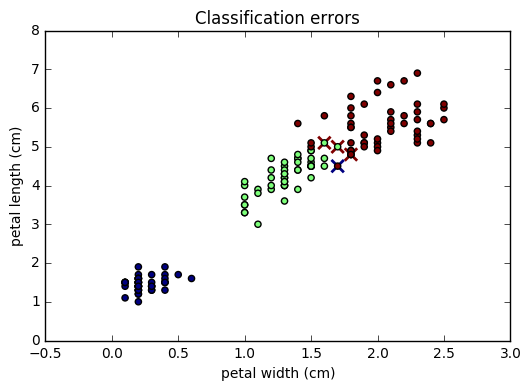

In [26]:
xind, yind = most_important_features[0], most_important_features[1]
err = (y != y_pred)
scatter(X[err, xind], X[err, yind], c=y_pred[err], marker='x', s=80, linewidths=2)
scatter(X[:, xind], X[:, yind], c=y)
xlabel(iris_data.feature_names[xind])
ylabel(iris_data.feature_names[yind])
title(u'Classification errors')

#### Визуализация дерева

In [27]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file='tree.dot', feature_names=iris_data.feature_names)

In [28]:
!dot -Tpng tree.dot -o tree.png

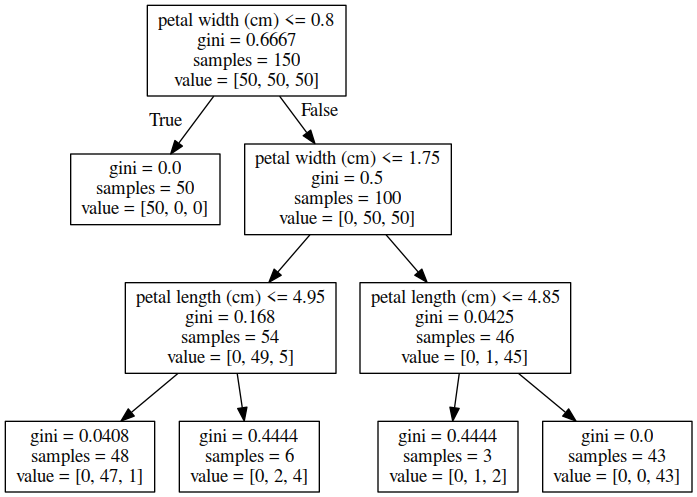

In [29]:
from IPython.display import Image
Image('tree.png')

## Кросс-валидация

In [30]:
from sklearn.datasets import load_boston
boston_data = load_boston()
X, y = boston_data.data, boston_data.target

Зафиксируем разбиение для 5-fold кросс-валидации.

In [31]:
from sklearn.cross_validation import KFold
cv = KFold(n=len(y), n_folds=5, shuffle=True, random_state=123)

Обратите внимание на аргументы:
 

- shuffle=True — без него фолды будут формироваться из последовательно идущих объектов, что нехорошо — в этом поможет убедиться задание в части 2;
- random_state — если этот параметр не выставить, то после каждого запуска команды будет генерироваться новое разбиение на фолды; крайне желательно, чтобы ваши эксперименты были в точности воспроизводимы — это упрощает исследования.


Оценим качество регрессии KNN на наборе Boston Housing для различных значений K (число соседей). В качестве метрики качества возьмем модуль отклонения:

 $MAE=\sum_i|y_{pred,i}-y_i|$


In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import cross_val_score

Переберем ряд значений n_neigbors, для каждого оценим среднее и стандартное отклонение MAE по кросс-валидации. Магия %%time позволяет измерить время работы ячейки с кодом.

In [33]:
%%time 

k_values = range(1, 10) + range(10, 50, 5)
mae_cv_mean = []
mae_cv_std = []

for k in k_values:
    clf = KNeighborsRegressor(n_neighbors=k)
    mae_folds = -cross_val_score(clf, X, y, cv=cv, scoring='mean_absolute_error')
    mae_cv_mean.append(mae_folds.mean())
    mae_cv_std.append(mae_folds.std())

CPU times: user 230 ms, sys: 3.33 ms, total: 233 ms
Wall time: 232 ms


#### График, демонстрирующий оптимальность выбора числа соседей

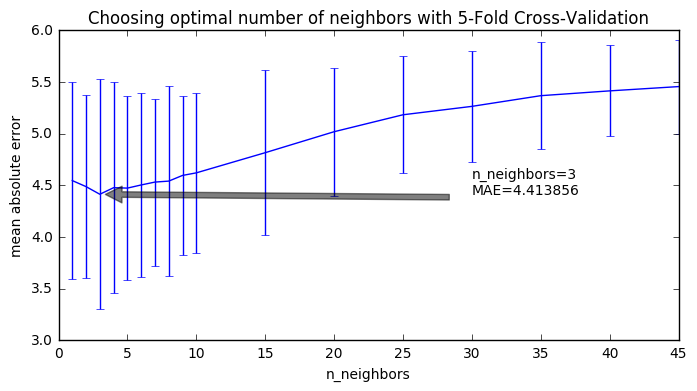

In [34]:
figure(figsize=(8, 4))
errorbar(k_values, mae_cv_mean, yerr=array(mae_cv_std)*2)
title('Choosing optimal number of neighbors with 5-Fold Cross-Validation')
xlabel('n_neighbors')
ylabel('mean absolute error')

opt_idx = argmin(mae_cv_mean)
optimal_k = k_values[opt_idx]
optimal_mae = mae_cv_mean[opt_idx]
annotate('n_neighbors=%d\nMAE=%f' % (optimal_k, optimal_mae), 
         xy=(opt_idx, optimal_mae), xytext=(30, optimal_mae), 
         arrowprops=dict(facecolor='black', shrink=0.05, alpha=0.5))